In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from scipy.stats import mannwhitneyu
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.dates as mdates
datapath = f'/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new'
from pathlib import Path

In [2]:
fires = gpd.read_file('/g/data/ng72/as9583/merged_fires.gpkg')
fires = fires.to_crs("EPSG:7844")

## Air Temperature (1.5m) 

In [3]:
variable = 'air_temperature_1p5m'

experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
allvar = xr.open_dataset(f'{datapath}/{variable}/{experiment1}{variable}.nc')['air_temperature']

experiment2 = 'control_d0198_RAL3P2_' 
control = xr.open_dataset(f'{datapath}/{variable}/{experiment2}{variable}.nc')['air_temperature']

experiment3 = 'control_d0198_RAL3P2_albedo_bare_'
albedo_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment3}{variable}.nc')['air_temperature']

experiment4 = 'control_d0198_RAL3P2_albedo_'
albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment4}{variable}.nc')['air_temperature']

experiment5 = 'control_d0198_RAL3P2_bare_'
bare = xr.open_dataset(f'{datapath}/{variable}/{experiment5}{variable}.nc')['air_temperature']

experiment6 = 'drysoil_d0198_RAL3P2_albedo_'
SM_albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment6}{variable}.nc')['air_temperature']

experiment7 = 'drysoil_d0198_RAL3P2_bare_'
SM_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment7}{variable}.nc')['air_temperature']

experiment8 = 'drysoil_d0198_RAL3P2_'
SM = xr.open_dataset(f'{datapath}/{variable}/{experiment8}{variable}.nc')['air_temperature']

variable3 = 'land_sea_mask'
landmask = xr.open_dataset(f'{datapath}/{variable3}/{experiment1}{variable3}.nc')["land_binary_mask"].isel(time=0)
allvar = allvar.where(landmask == 1)
control = control.where(landmask == 1)
albedo_bare = albedo_bare.where(landmask == 1)
albedo = albedo.where(landmask == 1)
bare = bare.where(landmask == 1)
SM_albedo = SM_albedo.where(landmask == 1)
SM_bare = SM_bare.where(landmask == 1)
SM = SM.where(landmask == 1)

experiments_t = {
    "AllVar": allvar,
    "Control": control,
    "Albedo_Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM_Albedo": SM_albedo,
    "SM_Bare": SM_bare,
    "SM": SM
}


In [4]:
clipped = {}

for name, da in experiments_t.items():
    da = da.rio.write_crs("EPSG:7844")
    
    clipped_da = da.rio.clip(fires.geometry, fires.crs, drop=True, invert=False)
    
    clipped[name] = clipped_da

allvar = clipped['AllVar']
control =clipped['Control']
albedo_bare =clipped['Albedo_Bare']
albedo =clipped['Albedo']
bare =clipped['Bare']
SM_albedo =clipped['SM_Albedo']
SM_bare=clipped['SM_Bare']
SM =clipped['SM']

experiments_t = {
    "All Variables": allvar,
    "Control": control,
    "Albedo + Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM + Albedo": SM_albedo,
    "SM + Bare": SM_bare,
    "SM": SM
}

In [5]:
#spatial mean
t_series = {}
for name, da in experiments_t.items():
    da = da.assign_coords(time=da.time + pd.Timedelta(hours=10)) #shift to AEST
    t_series[name] = da.mean(dim=["latitude", "longitude"], skipna=True)

#diurnal cycle
t_diurnal = {}
for name, series in t_series.items():
    t_diurnal[name] = series.groupby("time.hour").mean("time")

ref = t_diurnal["Control"]

#diff from control
t_diff = {}
for name, series in t_diurnal.items():
    if name != "Control":
        #align on hour
        series, ref_aligned = xr.align(series, ref)
        t_diff[name] = series - ref_aligned

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Enteri

## Boundary layer height

In [6]:
variable = 'boundary_layer_thickness'

experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
allvar = xr.open_dataset(f'{datapath}/{variable}/{experiment1}{variable}.nc')['atmosphere_boundary_layer_thickness']

experiment2 = 'control_d0198_RAL3P2_' 
control = xr.open_dataset(f'{datapath}/{variable}/{experiment2}{variable}.nc')['atmosphere_boundary_layer_thickness']

experiment3 = 'control_d0198_RAL3P2_albedo_bare_'
albedo_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment3}{variable}.nc')['atmosphere_boundary_layer_thickness']

experiment4 = 'control_d0198_RAL3P2_albedo_'
albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment4}{variable}.nc')['atmosphere_boundary_layer_thickness']

experiment5 = 'control_d0198_RAL3P2_bare_'
bare = xr.open_dataset(f'{datapath}/{variable}/{experiment5}{variable}.nc')['atmosphere_boundary_layer_thickness']

experiment6 = 'drysoil_d0198_RAL3P2_albedo_'
SM_albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment6}{variable}.nc')['atmosphere_boundary_layer_thickness']

experiment7 = 'drysoil_d0198_RAL3P2_bare_'
SM_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment7}{variable}.nc')['atmosphere_boundary_layer_thickness']

experiment8 = 'drysoil_d0198_RAL3P2_'
SM = xr.open_dataset(f'{datapath}/{variable}/{experiment8}{variable}.nc')['atmosphere_boundary_layer_thickness']

allvar = allvar.where(landmask == 1)
control = control.where(landmask == 1)
albedo_bare = albedo_bare.where(landmask == 1)
albedo = albedo.where(landmask == 1)
bare = bare.where(landmask == 1)
SM_albedo = SM_albedo.where(landmask == 1)
SM_bare = SM_bare.where(landmask == 1)
SM = SM.where(landmask == 1)

#store experiments 
experiments_blh = {
    "All Variables": allvar,
    "Control": control,
    "Albedo + Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM + Albedo": SM_albedo,
    "SM + Bare": SM_bare,
    "SM": SM
}


In [7]:
#clip data to within the fire scars
clipped = {}

for name, da in experiments_blh.items():
    da = da.rio.write_crs("EPSG:7844")
    
    clipped_da = da.rio.clip(fires.geometry, fires.crs, drop=True, invert=False)
    
    clipped[name] = clipped_da

allvar = clipped['All Variables']
control =clipped['Control']
albedo_bare =clipped['Albedo + Bare']
albedo =clipped['Albedo']
bare =clipped['Bare']
SM_albedo =clipped['SM + Albedo']
SM_bare=clipped['SM + Bare']
SM =clipped['SM']

#new dictionary for clipped
experiments_blh = {
    "All Variables": allvar,
    "Control": control,
    "Albedo + Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM + Albedo": SM_albedo,
    "SM + Bare": SM_bare,
    "SM": SM
}

In [8]:
blh_series = {}

for name, da in experiments_blh.items():
    da = da.assign_coords(time=da.time + pd.Timedelta(hours=10))
    blh_series[name] = da.mean(dim=["latitude", "longitude"], skipna=True)

blh_diurnal = {}
for name, series in blh_series.items():
    blh_diurnal[name] = series.groupby("time.hour").mean("time")

ref = blh_diurnal["Control"]

blh_diff = {}
for name, series in blh_diurnal.items():
    if name != "Control":
        #align on hour dimension 
        series, ref_aligned = xr.align(series, ref)
        blh_diff[name] = series - ref_aligned

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Enteri

## Surface winds 10m

In [20]:
datapath = Path("/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new")
variables = ["wind_u_10m", "wind_v_10m"]

experiment_prefixes = {
    "All Variables": "drysoil_d0198_RAL3P2_albedo_bare_",
    "Control": "control_d0198_RAL3P2_",
    "Albedo + Bare": "control_d0198_RAL3P2_albedo_bare_",
    "Albedo": "control_d0198_RAL3P2_albedo_",
    "Bare": "control_d0198_RAL3P2_bare_",
    "SM + Albedo": "drysoil_d0198_RAL3P2_albedo_",
    "SM + Bare": "drysoil_d0198_RAL3P2_bare_",
    "SM": "drysoil_d0198_RAL3P2_",
}

experiments_uv = {}

for name, prefix in experiment_prefixes.items():
    da_u = xr.open_dataset(datapath / variables[0] / f"{prefix}{variables[0]}.nc")['x_wind']
    da_v = xr.open_dataset(datapath / variables[1] / f"{prefix}{variables[1]}.nc")['y_wind']
    
    # Shift time to local if needed
    da_u = da_u.assign_coords(time=da_u.time + pd.Timedelta(hours=10))
    da_v = da_v.assign_coords(time=da_v.time + pd.Timedelta(hours=10))
    
    # Compute wind speed
    wind_speed = (da_u**2 + da_v**2)**0.5
    wind_speed = wind_speed.rename("wind_speed")
    
    # Ensure CRS is set for rioxarray
    wind_speed.rio.write_crs("EPSG:7844", inplace=True)
    
    experiments_uv[name] = wind_speed

In [21]:
clipped = {}
for name, da in experiments_uv.items():
    da.rio.write_crs("EPSG:7844", inplace=True)
    clipped[name] = da.rio.clip(fires.geometry, fires.crs, drop=True, invert=False)

In [24]:
wind_series = {}

for name, da in clipped.items():
    # Shift to local time
    # da = da.assign_coords(time=da.time + pd.Timedelta(hours=10))
    
    # Spatial mean (averaging inside fire region)
    wind_series[name] = da.mean(dim=["latitude", "longitude"], skipna=True)

wind_diurnal = {}

for name, series in wind_series.items():
    wind_diurnal[name] = series.groupby("time.hour").mean("time")

ref = wind_diurnal["Control"]
uv_diff = {}

for name, series in wind_diurnal.items():
    if name != "Control":
        # Align hours to ensure same dimension
        series, ref_aligned = xr.align(series, ref)
        uv_diff[name] = series - ref_aligned

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Enteri

## upward air velocity

In [27]:
variable = 'upward_air_velocity_850hPa'

experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
allvar = xr.open_dataset(f'{datapath}/{variable}/{experiment1}{variable}.nc')['upward_air_velocity']

experiment2 = 'control_d0198_RAL3P2_' 
control = xr.open_dataset(f'{datapath}/{variable}/{experiment2}{variable}.nc')['upward_air_velocity']

experiment3 = 'control_d0198_RAL3P2_albedo_bare_'
albedo_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment3}{variable}.nc')['upward_air_velocity']

experiment4 = 'control_d0198_RAL3P2_albedo_'
albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment4}{variable}.nc')['upward_air_velocity']

experiment5 = 'control_d0198_RAL3P2_bare_'
bare = xr.open_dataset(f'{datapath}/{variable}/{experiment5}{variable}.nc')['upward_air_velocity']

experiment6 = 'drysoil_d0198_RAL3P2_albedo_'
SM_albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment6}{variable}.nc')['upward_air_velocity']

experiment7 = 'drysoil_d0198_RAL3P2_bare_'
SM_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment7}{variable}.nc')['upward_air_velocity']

experiment8 = 'drysoil_d0198_RAL3P2_'
SM = xr.open_dataset(f'{datapath}/{variable}/{experiment8}{variable}.nc')['upward_air_velocity']

In [30]:
allvar

<xarray.DataArray 'upward_air_velocity' (time: 240, latitude: 450,
                                         longitude: 450)> Size: 194MB
array([[[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
...
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2kB 2020-01-14T03:00:00 ... 2020-02-13
  * latitude   (latitude) float32 2kB -37.96 -37.94 -37.92 ... -29.08 -29.06
  * longitude  (longitude) float32 2kB 146.0 146.1 146.1 ... 154.9 154.9 154.9
    pressure   float64 8B ...
Attributes:
    standard_name:  upward_air_velocity
    source:         Data from Met Office Unified Model
    units:          m s-1
    um_version:     13.0
    STASH:          [  1  15 242]

In [29]:
allvar = allvar.where(landmask == 1)
control = control.where(landmask == 1)
albedo_bare = albedo_bare.where(landmask == 1)
albedo = albedo.where(landmask == 1)
bare = bare.where(landmask == 1)
SM_albedo = SM_albedo.where(landmask == 1)
SM_bare = SM_bare.where(landmask == 1)
SM = SM.where(landmask == 1)

#store experiments 
experiments_upward = {
    "All Variables": allvar,
    "Control": control,
    "Albedo + Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM + Albedo": SM_albedo,
    "SM + Bare": SM_bare,
    "SM": SM
}

#convert to cm/s from m/s
for name in experiments_upward:
    experiments_upward[name] = experiments_upward[name] * 100

In [31]:
#clip data to within the fire scars

clipped = {}

for name, da in experiments_upward.items():
    da = da.rio.write_crs("EPSG:7844")    
    clipped_da = da.rio.clip(fires.geometry, fires.crs, drop=True, invert=False) 
    clipped[name] = clipped_da

allvar = clipped['All Variables']
control =clipped['Control']
albedo_bare =clipped['Albedo + Bare']
albedo =clipped['Albedo']
bare =clipped['Bare']
SM_albedo =clipped['SM + Albedo']
SM_bare=clipped['SM + Bare']
SM =clipped['SM']

#new dictionary for clipped
experiments_upward = {
    "All Variables": allvar,
    "Control": control,
    "Albedo + Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM + Albedo": SM_albedo,
    "SM + Bare": SM_bare,
    "SM": SM
}

In [32]:
upward_series = {}

for name, da in experiments_upward.items():
    da = da.assign_coords(time=da.time + pd.Timedelta(hours=10))
    upward_series[name] = da.mean(dim=["latitude", "longitude"], skipna=True)

upward_diurnal = {}
for name, series in upward_series.items():
    upward_diurnal[name] = series.groupby("time.hour").mean("time")

ref = upward_diurnal["Control"]

upward_diff = {}
for name, series in upward_diurnal.items():
    if name != "Control":
        #align on hour dimension 
        series, ref_aligned = xr.align(series, ref)
        upward_diff[name] = series - ref_aligned

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Enteri

## Joined

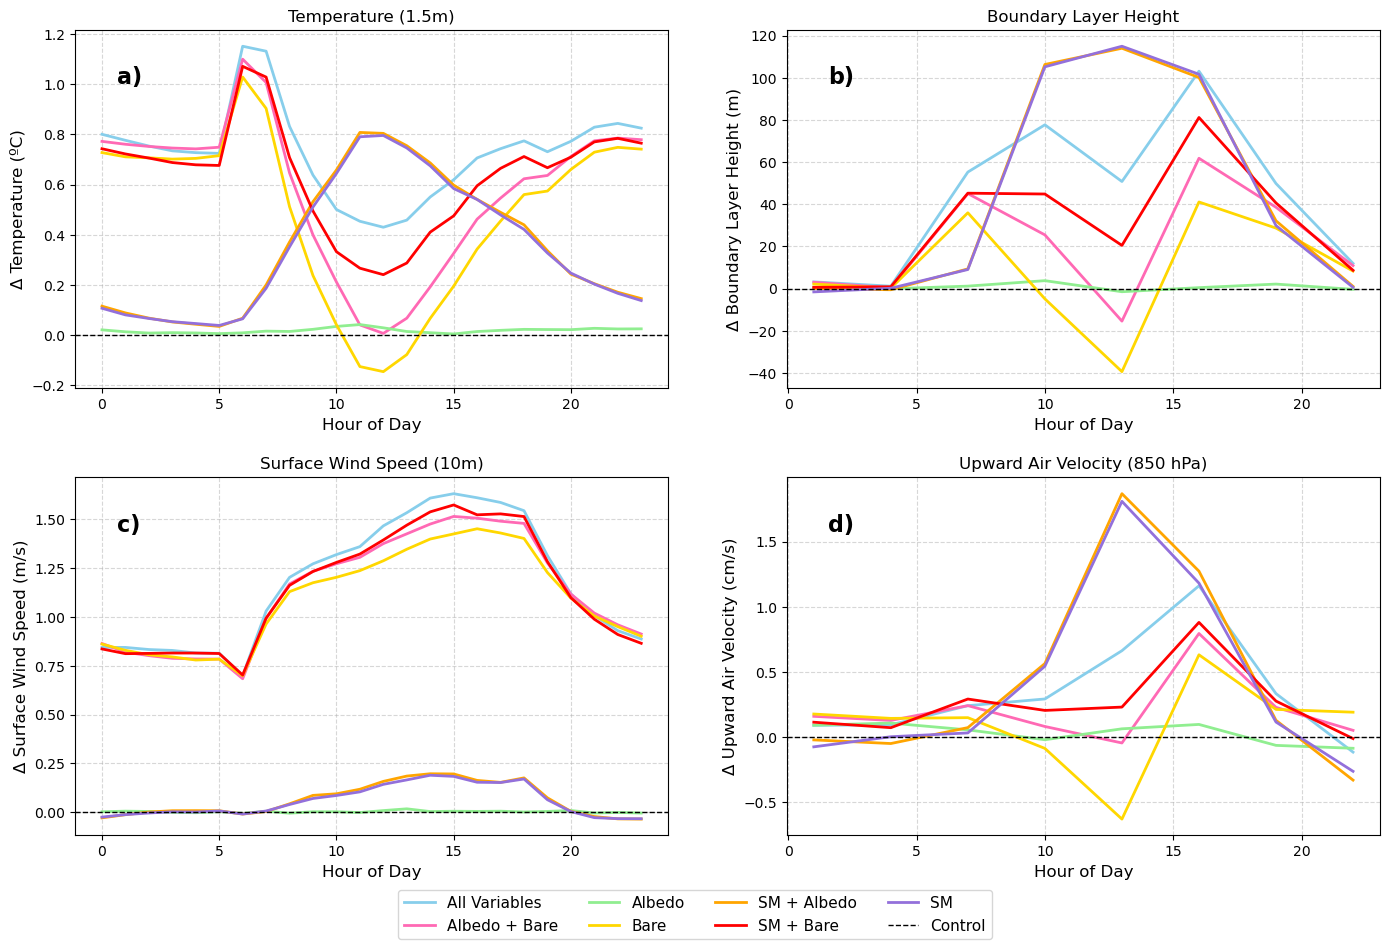

In [40]:
colors = ["skyblue", "hotpink", "lightgreen", "gold", 
          "orange", "red", "mediumpurple", "pink"]

#all datasets
diff_datasets = [t_diff, blh_diff, uv_diff, upward_diff]
titles = [
    "Temperature (1.5m)",
    "Boundary Layer Height",
    "Surface Wind Speed (10m)",
    "Upward Air Velocity (850 hPa)"
]
ylabels = [
    "Δ Temperature (ºC)",
    "Δ Boundary Layer Height (m)",
    "Δ Surface Wind Speed (m/s)",
    "Δ Upward Air Velocity (cm/s)"
]
labels = ['a)', 'b)', 'c)', 'd)']

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False)
axes = axes.flatten()

#experiment order from one dataset
experiment_names = list(t_diff.keys())

for i, (ax, dataset, title, ylabel) in enumerate(zip(axes, diff_datasets, titles, ylabels)):
    for name, color in zip(experiment_names, colors):
        diff = dataset[name]
        ax.plot(diff["hour"], diff.values, color=color, label=name, linewidth=2)
    ax.axhline(0, color="k", linestyle="--", linewidth=1, label = 'Control')
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Hour of Day", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.text(0.07, 0.9, labels[i], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left')

#legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, fontsize=11)
# fig.legend(experiment_names, loc="lower center", ncol=4, fontsize=11)
# fig.suptitle("Difference in Diurnal Cycle from Control (All Experiments)", fontsize=15, weight="bold")
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
fig.subplots_adjust(wspace = 0.2, hspace = 0.25)
plt.savefig('/g/data/ng72/as9583/new_analysis/figures/localised_changes.png')
plt.show()
